In [126]:
import pandas as pd
weather = pd.read_csv("data2_modified.csv", index_col="date")


In [173]:
weather 

,TS,QV2M,PRECTOTCORR
date,,,
1982-01-01,15.33,5.86,0.00
1982-01-02,14.92,5.62,0.00
1982-01-03,15.54,5.43,0.00
1982-01-04,16.52,6.35,0.36
1982-01-05,18.86,8.00,0.35
...,...,...,...
2023-12-28,18.74,10.74,0.00
2023-12-29,18.73,10.86,0.01
2023-12-30,18.24,10.25,0.00


NameError: name 'your_dataframe' is not defined

In [132]:
weather.apply(pd.isnull).sum()/weather.shape[0]

TS             0.0
QV2M           0.0
PRECTOTCORR    0.0
dtype: float64

In [134]:
weather.columns

Index(['TS', 'QV2M', 'PRECTOTCORR'], dtype='object')

In [37]:
core_weather = weather.copy()

In [38]:
core_weather.columns= ["temp_avg", "humidity","precip"]

In [39]:
core_weather

,temp_avg,humidity,precip
date,,,
1982-01-01,15.33,5.86,0.00
1982-01-02,14.92,5.62,0.00
1982-01-03,15.54,5.43,0.00
1982-01-04,16.52,6.35,0.36
1982-01-05,18.86,8.00,0.35
...,...,...,...
2023-12-28,18.74,10.74,0.00
2023-12-29,18.73,10.86,0.01
2023-12-30,18.24,10.25,0.00


In [40]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

temp_avg    0.0
humidity    0.0
precip      0.0
dtype: float64

In [42]:
core_weather["temp_avg"].value_counts()

temp_avg
29.51    40
28.65    37
28.94    36
28.40    35
29.01    33
         ..
37.79     1
14.62     1
13.69     1
12.92     1
14.79     1
Name: count, Length: 2536, dtype: int64

In [43]:
core_weather.dtypes

temp_avg    float64
humidity    float64
precip      float64
dtype: object

In [45]:
core_weather.index

Index(['1982-01-01', '1982-01-02', '1982-01-03', '1982-01-04', '1982-01-05',
       '1982-01-06', '1982-01-07', '1982-01-08', '1982-01-09', '1982-01-10',
       ...
       '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
       '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01'],
      dtype='object', name='date', length=15341)

In [48]:
core_weather.index=pd.to_datetime(core_weather.index)

In [50]:
core_weather.index

DatetimeIndex(['1982-01-01', '1982-01-02', '1982-01-03', '1982-01-04',
               '1982-01-05', '1982-01-06', '1982-01-07', '1982-01-08',
               '1982-01-09', '1982-01-10',
               ...
               '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30',
               '2023-12-31', '2024-01-01'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [53]:
core_weather

,temp_avg,humidity,precip
date,,,
1982-01-01,15.33,5.86,0.00
1982-01-02,14.92,5.62,0.00
1982-01-03,15.54,5.43,0.00
1982-01-04,16.52,6.35,0.36
1982-01-05,18.86,8.00,0.35
...,...,...,...
2023-12-28,18.74,10.74,0.00
2023-12-29,18.73,10.86,0.01
2023-12-30,18.24,10.25,0.00


In [55]:
core_weather.apply(lambda x: (x==9999).sum())

temp_avg    0
humidity    0
precip      0
dtype: int64

<Axes: xlabel='date'>

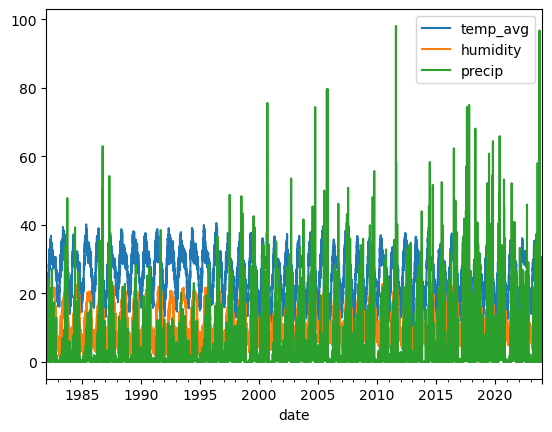

In [57]:
core_weather.plot()

<Axes: xlabel='date'>

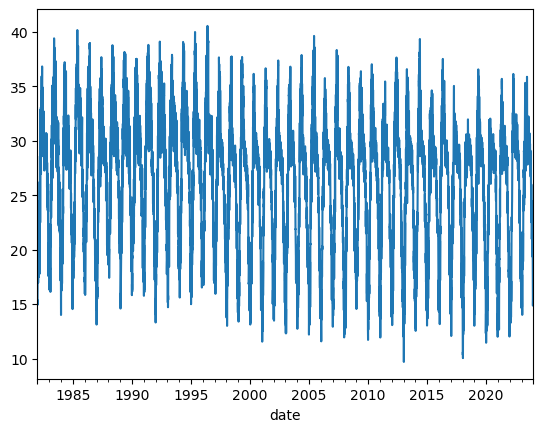

In [59]:
core_weather["temp_avg"].plot()

<Axes: xlabel='date'>

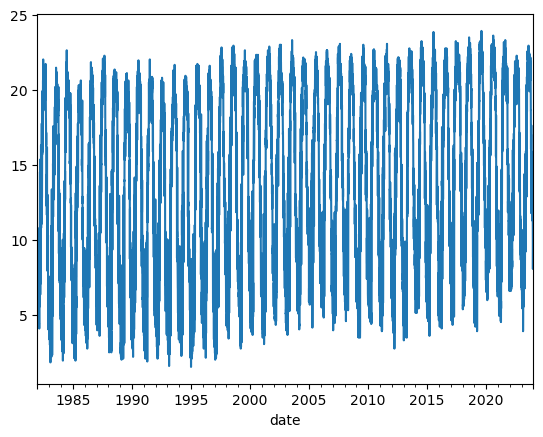

In [60]:
core_weather["humidity"].plot()

<Axes: xlabel='date'>

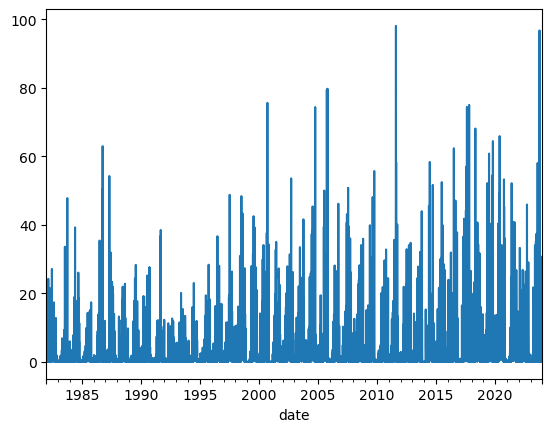

In [61]:
core_weather["precip"].plot()

In [62]:
core_weather["precip"]

date
1982-01-01    0.00
1982-01-02    0.00
1982-01-03    0.00
1982-01-04    0.36
1982-01-05    0.35
              ... 
2023-12-28    0.00
2023-12-29    0.01
2023-12-30    0.00
2023-12-31    0.00
2024-01-01    0.00
Name: precip, Length: 15341, dtype: float64

In [64]:
core_weather["target"] = core_weather.shift(-1)["temp_avg"]

In [66]:
core_weather

,temp_avg,humidity,precip,target
date,,,,
1982-01-01,15.33,5.86,0.00,14.92
1982-01-02,14.92,5.62,0.00,15.54
1982-01-03,15.54,5.43,0.00,16.52
1982-01-04,16.52,6.35,0.36,18.86
1982-01-05,18.86,8.00,0.35,18.87
...,...,...,...,...
2023-12-28,18.74,10.74,0.00,18.73
2023-12-29,18.73,10.86,0.01,18.24
2023-12-30,18.24,10.25,0.00,17.09


In [67]:
core_weather= core_weather.iloc[:-1,:].copy()

In [68]:
core_weather

,temp_avg,humidity,precip,target
date,,,,
1982-01-01,15.33,5.86,0.00,14.92
1982-01-02,14.92,5.62,0.00,15.54
1982-01-03,15.54,5.43,0.00,16.52
1982-01-04,16.52,6.35,0.36,18.86
1982-01-05,18.86,8.00,0.35,18.87
...,...,...,...,...
2023-12-27,18.48,11.05,0.02,18.74
2023-12-28,18.74,10.74,0.00,18.73
2023-12-29,18.73,10.86,0.01,18.24


In [70]:
from sklearn.linear_model import Ridge

reg= Ridge(alpha=.1)

In [71]:
core_weather.columns

Index(['temp_avg', 'humidity', 'precip', 'target'], dtype='object')

In [72]:
predictor=["precip","temp_avg","humidity"]

In [94]:
train=core_weather.loc[:"2018-12-31"]
train

,temp_avg,humidity,precip,target
date,,,,
1982-01-01,15.33,5.86,0.00,14.92
1982-01-02,14.92,5.62,0.00,15.54
1982-01-03,15.54,5.43,0.00,16.52
1982-01-04,16.52,6.35,0.36,18.86
1982-01-05,18.86,8.00,0.35,18.87
...,...,...,...,...
2018-12-27,13.40,4.64,0.00,13.46
2018-12-28,13.46,4.46,0.00,13.01
2018-12-29,13.01,4.58,0.00,14.10


In [95]:
test=core_weather.loc["2019-01-01":]
test

,temp_avg,humidity,precip,target
date,,,,
2019-01-01,15.97,6.35,0.00,16.44
2019-01-02,16.44,6.90,0.00,15.19
2019-01-03,15.19,5.74,0.00,14.06
2019-01-04,14.06,5.49,0.00,16.16
2019-01-05,16.16,7.08,0.00,17.73
...,...,...,...,...
2023-12-27,18.48,11.05,0.02,18.74
2023-12-28,18.74,10.74,0.00,18.73
2023-12-29,18.73,10.86,0.01,18.24


In [96]:
reg.fit(train[predictor], train["target"])

Ridge(alpha=0.1)

In [102]:
prediction=reg.predict(test[predictor])

In [103]:
from sklearn.metrics import mean_absolute_error

In [111]:
mean_absolute_error(test["target"], prediction)

0.7323114375186182

In [112]:
reg.score(train[predictor], train["target"])

0.9690682426132317

In [107]:
test

,temp_avg,humidity,precip,target
date,,,,
2019-01-01,15.97,6.35,0.00,16.44
2019-01-02,16.44,6.90,0.00,15.19
2019-01-03,15.19,5.74,0.00,14.06
2019-01-04,14.06,5.49,0.00,16.16
2019-01-05,16.16,7.08,0.00,17.73
...,...,...,...,...
2023-12-27,18.48,11.05,0.02,18.74
2023-12-28,18.74,10.74,0.00,18.73
2023-12-29,18.73,10.86,0.01,18.24


In [108]:
combined= pd.concat([test["target"],pd.Series(prediction, index= test.index)], axis=1)
combined.columns = ["actuals","prediction"]

In [109]:
combined

,actuals,prediction
date,,
2019-01-01,16.44,16.138646
2019-01-02,15.19,16.596423
2019-01-03,14.06,15.374383
2019-01-04,16.16,14.257661
2019-01-05,17.73,16.316078
...,...,...
2023-12-27,18.74,18.557090
2023-12-28,18.73,18.819352
2023-12-29,18.24,18.807736


<Axes: xlabel='date'>

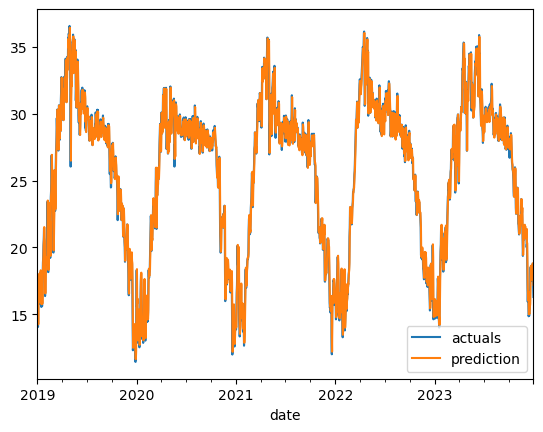

In [110]:
ax= combined.plot()
ax.set_xlabel('Date')
ax.set_ylabel('')
ax.set_title('Mean Squared Error for Different Models')

In [143]:
int_features=[16,7,0]
import numpy as np
final=[np.array(int_features)]

In [162]:
core_weather.columns

Index(['temp_avg', 'humidity', 'precip', 'target'], dtype='object')

In [170]:
new_data = np.array([[16.0, 9.0, 0.0]])  # Replace this with your own input features

feature_names = ['temp_avg', 'humidity', 'precip']
new_data_dict = {'temp_avg': [16.0], 'humidity': [9.0], 'precip': [0.1]}
new_data_df = pd.DataFrame(new_data_dict, columns=feature_names)
# Example: Making predictions
prediction = reg.predict(new_data_df[predictor])
prediction

array([16.12960344])

In [171]:
prediction

array([16.12960344])

In [184]:
int_features= [86.0, 0, 0]
feature_names = ['temp_avg', 'precip','humidity']
predictor=["precip","temp_avg","humidity"]
new_data_df = pd.DataFrame([int_features], columns=feature_names)
prediction = reg.predict(new_data_df[predictor])
print(int_features)
print(new_data_df)
# prediction=model.predict_proba(final)
print(f"prediction={prediction}")

[86.0, 0, 0]
   temp_avg  precip  humidity
0      86.0       0         0
prediction=[85.67394957]


In [149]:
mse_values = {
    'Ridge Regression': 0.9820560050621511,
    'Random Forest Regression': 1.139919832457926,
    'Decision Tree Regression': 2.0911670865279297
}
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'Mean Squared Error'])

In [172]:
import pickle

# Assuming 'ridge_model' is your trained Ridge Regression model
with open('ridge_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)

In [152]:
mse_df

,Model,Mean Squared Error
0,Ridge Regression,0.982056
1,Random Forest Regression,1.139920
2,Decision Tree Regression,2.091167


In [178]:
core_weather.to_csv('core_weather.csv', index=True)